In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
plt.rcParams['figure.facecolor'] = '0.2'

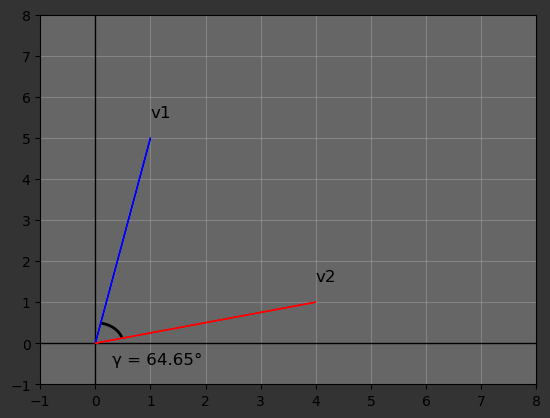

In [3]:
v1 = np.array([1, 5])
v2 = np.array([4, 1])

angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

start_angle = np.degrees(np.arctan2(v1[1], v1[0]))
end_angle = np.degrees(np.arctan2(v2[1], v2[0]))

if start_angle < end_angle:
    theta1 = start_angle
    theta2 = end_angle
else:
    theta1 = end_angle
    theta2 = start_angle

plt.axes().set_facecolor('0.4')
plt.arrow(0, 0, v1[0], v1[1], head_width=0, head_length=0, fc='b', ec='b', zorder=3)
plt.arrow(0, 0, v2[0], v2[1], head_width=0, head_length=0, fc='r', ec='r',zorder=3)
plt.text(v1[0], v1[1]+.5, 'v1', fontsize=12)
plt.text(v2[0], v2[1]+.5, 'v2', fontsize=12)
plt.text(0.3, -.5, 'γ = {:.2f}°'.format(np.degrees(angle)), fontsize=12)
plt.axhline(y=0, color='black', linewidth=1, zorder=2)
plt.axvline(x=0, color='black', linewidth=1, zorder=2)
plt.grid(zorder=1,alpha=0.4)
arc = Arc((0, 0), 1, 1, angle=0, theta1=theta1, theta2=theta2, color='black', linewidth=2)
plt.gca().add_patch(arc)

plt.xlim([-1, 8])
plt.ylim([-1, 8])

plt.show()

In [4]:
np.degrees(angle)

64.6538240580533

In [5]:
np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

0.4280863447390447

In [6]:
np.linalg.norm(np.array([2,2]))

2.8284271247461903

In [7]:
np.sqrt(2**2 + 2**2)

2.8284271247461903

In [8]:
M = np.eye(3)
vec = np.array([1,2,3])

In [9]:
M @ vec

array([1., 2., 3.])

In [10]:
vec @ M

array([1., 2., 3.])

In [40]:
def matrix_vector_product(A, v_in):
    n = len(A)
    vec_out = [0] * n
    for i in range(n):
        for j in range(n):
            vec_out[i] += A[i][j] * v_in[j]  
    return vec_out

In [41]:
A = [[1,0,0], [0,1,0], [0,0,1]]
A_ = np.array(A)

v1 = [1,2,3]
v1_ = np.array(v1)

In [47]:
A_ @ v1_, matrix_vector_product(A, v1)

(array([1, 2, 3]), [1, 2, 3])

In [51]:
B = [[1,0,0],
     [0,1,0],
     [0,0,1],
     [2,2,2]]

B_ = np.array(B)

v2 = [1,2,3]
v2_ = np.array(v1)

In [60]:
def matrix_vector_product(A, v_in):
    vec_out = [0] * len(A)
    for i in range(len(A)):
        for j in range(len(A[0])):
            vec_out[i] += A[i][j] * v_in[j]  
    return vec_out

In [61]:
matrix_vector_product(B, v2), B_ @ v2_

([1, 2, 3, 12], array([ 1,  2,  3, 12]))

Given two matrices $A$ and $B$, where $A$ is of size $m \times n$ and $B$ is of size $n \times p$, the product $C = A \cdot B$ is a matrix of size $m \times p$.

The $i$th row and $j$th column entry of matrix $C$ is computed as follows:

$$
C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}
$$

In matrix notation:

$$
C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj} \quad \text{for} \quad i = 1,2,\ldots,m \quad \text{and} \quad j = 1,2,\ldots,p
$$

In [152]:
def matrix_multiplication(A, B):
    n, m, p  = len(A), len(A[0]), len(B[0])
    C = [[0] * p for i in range(n)]
    for i in range(n):
        for j in range(p):
            for k in range(m):    
                C[i][j] += A[i][k] * B[k][j]
    return C

In [166]:
def matrix_multiplication(A, B):
    n, m, p  = len(A), len(A[0]), len(B[0])
    C = [[0] * p for i in range(n)]
    for i in range(n):
        for j in range(p):
            C[i][j] = sum(a * b for a, b in zip(A[i], (row[j] for row in B)))
    return C

In [167]:
#thats it????

A = [list(range(4))] * 3
B = [list(range(5))] * 4
A_, B_ = np.array(A), np.array(B)

In [168]:
matrix_multiplication(A, B)

[[0, 6, 12, 18, 24], [0, 6, 12, 18, 24], [0, 6, 12, 18, 24]]

In [169]:
A_ @ B_

array([[ 0,  6, 12, 18, 24],
       [ 0,  6, 12, 18, 24],
       [ 0,  6, 12, 18, 24]])

In [162]:
A = [[0] * 3 for i in range(3)]

In [163]:
A[0][1] = 3

In [164]:
A

[[0, 3, 0], [0, 0, 0], [0, 0, 0]]